In [1012]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [1013]:
df = pd.read_csv('mudah-apartment-kl-selangor.csv')
df.head()

,ads_id,prop_name,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region
0,100323185,The Hipster @ Taman Desa,2022.0,RM 4 200 per month,Kuala Lumpur - Taman Desa,Condominium,5,2.0,6.0,1842 sq.ft.,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur
1,100203973,Segar Courts,NaN,RM 2 300 per month,Kuala Lumpur - Cheras,Condominium,3,1.0,2.0,1170 sq.ft.,Partially Furnished,"Playground, Parking, Barbeque area, Security, ...","Air-Cond, Cooking Allowed, Near KTM/LRT",Kuala Lumpur
2,100323128,Pangsapuri Teratak Muhibbah 2,NaN,RM 1 000 per month,Kuala Lumpur - Taman Desa,Apartment,3,NaN,2.0,650 sq.ft.,Fully Furnished,"Minimart, Jogging Track, Lift, Swimming Pool",NaN,Kuala Lumpur
3,100191767,Sentul Point Suite Apartment,2020.0,RM 1 700 per month,Kuala Lumpur - Sentul,Apartment,2,1.0,2.0,743 sq.ft.,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur
4,97022692,Arte Mont Kiara,NaN,RM 1 299 per month,Kuala Lumpur - Mont Kiara,Service Residence,1,1.0,1.0,494 sq.ft.,Not Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...",Air-Cond,Kuala Lumpur


**Data Preprocessing**

In [1014]:
df.isna().sum()

ads_id                      0
prop_name                 948
completion_year          9185
monthly_rent                2
location                    0
property_type               0
rooms                       6
parking                  5702
bathroom                    6
size                        0
furnished                   5
facilities               2209
additional_facilities    5948
region                      0
dtype: int64

Handling Missing Values:
<ul>
<li>
Montly Rent: Dropped because it is a target variable, not advisable to fill it using mode/median because the variable should be as accurate as possible.
</li>
<li>
Rooms & Bathroom: Both of these columns have high correlations with price, I think that is not advisable to fill it using mode/median. Let's just drop this value so that it does not mess up our predictions.
</li>
<li>
Completion Year: Dropped to avoid disrupting our predictions.
</li>
<li>
Parking & Furnished: Fill with value of 0. Because, we assume that the missing values indicate that the property doesn't have furnishing or car parks to begin with.
</li>
</ul>


In [1015]:
def fill_nan(df,column):
    df[column] = df[column].fillna(0)

    return df

def drop_nan(df,column):
    df=df.loc[df[column].notna()]
    
    return df

In [1016]:
df=fill_nan(df,'parking')
df=fill_nan(df,'furnished')
df.isna().sum()

ads_id                      0
prop_name                 948
completion_year          9185
monthly_rent                2
location                    0
property_type               0
rooms                       6
parking                     0
bathroom                    6
size                        0
furnished                   0
facilities               2209
additional_facilities    5948
region                      0
dtype: int64

In [1017]:
df=drop_nan(df,'rooms')
df=drop_nan(df,'bathroom')
df=drop_nan(df,'monthly_rent')
df=drop_nan(df,'completion_year')
df.isna().sum()

ads_id                      0
prop_name                   0
completion_year             0
monthly_rent                0
location                    0
property_type               0
rooms                       0
parking                     0
bathroom                    0
size                        0
furnished                   0
facilities                809
additional_facilities    2976
region                      0
dtype: int64

**location**
<br>
With the existence of the column 'region' region name that exists in location is redundant.

In [1018]:
sorted(df['location'].unique())

['Kuala Lumpur - Ampang',
 'Kuala Lumpur - Ampang Hilir',
 'Kuala Lumpur - Bandar Damai Perdana',
 'Kuala Lumpur - Bandar Menjalara',
 'Kuala Lumpur - Bangsar',
 'Kuala Lumpur - Bangsar South',
 'Kuala Lumpur - Brickfields',
 'Kuala Lumpur - Bukit Bintang',
 'Kuala Lumpur - Bukit Jalil',
 'Kuala Lumpur - Bukit Tunku',
 'Kuala Lumpur - Cheras',
 'Kuala Lumpur - City Centre',
 'Kuala Lumpur - Damansara Heights',
 'Kuala Lumpur - Desa Pandan',
 'Kuala Lumpur - Desa ParkCity',
 'Kuala Lumpur - Desa Petaling',
 'Kuala Lumpur - Gombak',
 'Kuala Lumpur - Jalan Ipoh',
 'Kuala Lumpur - Jalan Kuching',
 'Kuala Lumpur - Jalan Sultan Ismail',
 'Kuala Lumpur - KL City',
 'Kuala Lumpur - KL Eco City',
 'Kuala Lumpur - KL Sentral',
 'Kuala Lumpur - KLCC',
 'Kuala Lumpur - Kepong',
 'Kuala Lumpur - Keramat',
 'Kuala Lumpur - Kuchai Lama',
 'Kuala Lumpur - Mid Valley City',
 'Kuala Lumpur - Mont Kiara',
 'Kuala Lumpur - Old Klang Road',
 'Kuala Lumpur - Pandan Jaya',
 'Kuala Lumpur - Pandan Perdana',
 

Convert location to only include the area

In [1019]:
def get_area(val):
    return val.split(' - ')[1].strip()

df["area"] = df["location"].apply(get_area)

In [1020]:
sorted(df['area'].unique())

['360',
 '369',
 '389',
 '517',
 '639',
 'Alam Impian',
 'Ampang',
 'Ampang Hilir',
 'Ara Damansara',
 'Balakong',
 'Bandar Damai Perdana',
 'Bandar Kinrara',
 'Bandar Menjalara',
 'Bandar Saujana Putra',
 'Bandar Sri Damansara',
 'Bandar Sungai Long',
 'Bandar Sunway',
 'Bandar Utama',
 'Bangi',
 'Bangsar',
 'Bangsar South',
 'Batu Caves',
 'Brickfields',
 'Bukit Bintang',
 'Bukit Jalil',
 'Bukit Jelutong',
 'Bukit Tunku',
 'Cheras',
 'City Centre',
 'Cyberjaya',
 'Damansara Damai',
 'Damansara Heights',
 'Damansara Jaya',
 'Damansara Perdana',
 'Dengkil',
 'Desa Pandan',
 'Desa ParkCity',
 'Desa Petaling',
 'Glenmarie',
 'Gombak',
 'I-City',
 'Jalan Ipoh',
 'Jalan Kuching',
 'Jalan Sultan Ismail',
 'Jenjarom',
 'KL City',
 'KL Eco City',
 'KL Sentral',
 'KLCC',
 'Kajang',
 'Kelana Jaya',
 'Kepong',
 'Keramat',
 'Klang',
 'Kota Damansara',
 'Kota Kemuning',
 'Kuala Langat',
 'Kuchai Lama',
 'Mid Valley City',
 'Mont Kiara',
 'Old Klang Road',
 'Pandan Jaya',
 'Pandan Perdana',
 'Panta

In [1021]:
len(df['area'].unique())

99

Weird area names that are numbers like '360', '369', '389', etc are removed as they are not legitimate locations.

In [1022]:
df = df[df['area'].str.isdigit() == False]
len(df['area'].unique())

94

**Rooms**
<br>
Clean the Rooms column and introduce a numerical equivalent

In [1023]:
sorted(df['rooms'].unique())

['1',
 '1.0',
 '2',
 '2.0',
 '3',
 '3.0',
 '4',
 '4.0',
 '5',
 '5.0',
 '6',
 '6.0',
 '7',
 '9.0']

In [1024]:
def convert_room_num(rooms):
    if rooms == "More than 10":
        return 10.0
    return float(rooms)

df["rooms_num"] = df["rooms"].apply(convert_room_num)

In [1025]:
df["rooms_num"].value_counts()

3.0    6212
2.0    1954
1.0    1608
4.0     874
5.0      51
6.0      10
7.0       6
9.0       1
Name: rooms_num, dtype: int64

**monthly_rent**
<br>
Cleaning monthly_rent column from 'RM 4 200 per month' to 4200

In [1026]:
sorted(df['monthly_rent'].unique())

['RM 1 000 per month',
 'RM 1 049 per month',
 'RM 1 050 per month',
 'RM 1 098 per month',
 'RM 1 099 per month',
 'RM 1 100 per month',
 'RM 1 150 per month',
 'RM 1 180 per month',
 'RM 1 190 per month',
 'RM 1 198 per month',
 'RM 1 199 per month',
 'RM 1 200 per month',
 'RM 1 230 per month',
 'RM 1 249 per month',
 'RM 1 250 per month',
 'RM 1 280 per month',
 'RM 1 288 per month',
 'RM 1 297 per month',
 'RM 1 298 per month',
 'RM 1 299 per month',
 'RM 1 300 per month',
 'RM 1 340 per month',
 'RM 1 350 per month',
 'RM 1 360 per month',
 'RM 1 380 per month',
 'RM 1 388 per month',
 'RM 1 390 per month',
 'RM 1 398 per month',
 'RM 1 399 per month',
 'RM 1 400 per month',
 'RM 1 450 per month',
 'RM 1 480 per month',
 'RM 1 488 per month',
 'RM 1 490 per month',
 'RM 1 498 per month',
 'RM 1 499 per month',
 'RM 1 500 per month',
 'RM 1 548 per month',
 'RM 1 550 per month',
 'RM 1 580 per month',
 'RM 1 588 per month',
 'RM 1 590 per month',
 'RM 1 598 per month',
 'RM 1 599 

In [1027]:
def clean_monthly_rent(rent):
    rent = rent.replace("RM ", "")
    rent = rent.replace(" per month", "")
    rent = rent.replace(" ", "")

    return int(rent)

df["monthly_rent"] = df["monthly_rent"].apply(clean_monthly_rent)

In [1028]:
df.rename(columns = {'monthly_rent':'monthly_rent_rm'}, inplace = True)

In [1029]:
sorted(df['monthly_rent_rm'].unique())

[70,
 80,
 100,
 110,
 120,
 150,
 180,
 200,
 220,
 250,
 290,
 370,
 380,
 400,
 450,
 460,
 499,
 500,
 550,
 580,
 600,
 601,
 602,
 603,
 604,
 605,
 645,
 649,
 650,
 656,
 658,
 680,
 689,
 690,
 698,
 699,
 700,
 720,
 740,
 748,
 750,
 760,
 770,
 780,
 799,
 800,
 830,
 849,
 850,
 860,
 870,
 875,
 878,
 879,
 880,
 881,
 882,
 883,
 884,
 885,
 889,
 890,
 898,
 899,
 900,
 901,
 902,
 903,
 904,
 905,
 920,
 930,
 948,
 950,
 958,
 970,
 980,
 998,
 999,
 1000,
 1049,
 1050,
 1098,
 1099,
 1100,
 1150,
 1180,
 1190,
 1198,
 1199,
 1200,
 1230,
 1249,
 1250,
 1280,
 1288,
 1297,
 1298,
 1299,
 1300,
 1340,
 1350,
 1360,
 1380,
 1388,
 1390,
 1398,
 1399,
 1400,
 1450,
 1480,
 1488,
 1490,
 1498,
 1499,
 1500,
 1548,
 1550,
 1580,
 1588,
 1590,
 1598,
 1599,
 1600,
 1630,
 1650,
 1680,
 1688,
 1690,
 1693,
 1698,
 1699,
 1700,
 1712,
 1750,
 1780,
 1788,
 1790,
 1798,
 1799,
 1800,
 1810,
 1850,
 1880,
 1899,
 1900,
 1948,
 1949,
 1950,
 1980,
 1988,
 1990,
 1998,
 1999,
 20

**Size**
<br>
Convert size column to a numerical equivalent

In [1030]:
def clean_size(size):
    size = size.replace(' sq.ft.', '')
    return int(size)

df['size'] = df['size'].apply(clean_size)


In [1031]:
df.rename(columns = {'size':'size_sqft'}, inplace = True)

**Outlier Removal**

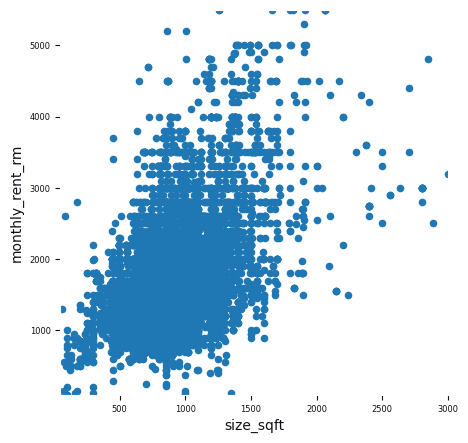

In [1032]:
df[['size_sqft', 'monthly_rent_rm']].plot(kind='scatter', x='size_sqft', y='monthly_rent_rm');
plt.ylim(100,5500)
plt.xlim(50,3000) 
plt.show()

**monthly_rent**
<br>
Remove rows that have a monthly_rent lower than RM100 and higher than RM5000, as they are not realistic rental prices

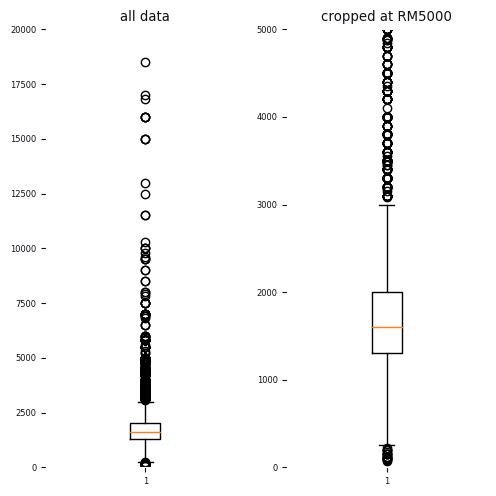

In [1033]:
fig, axs = plt.subplots(1,2)
axs[0].boxplot(data=df, x='monthly_rent_rm')
axs[0].set_ylim(0,20000)
axs[0].set_title('all data')

axs[1].boxplot(data=df, x='monthly_rent_rm')
axs[1].set_ylim(0,5000)
axs[1].set_title('cropped at RM5000')

plt.tight_layout()
plt.show()

In [1034]:
df = df[(df['monthly_rent_rm'] > 100) & (df['monthly_rent_rm'] < 5000 )]

Sanity check after removal

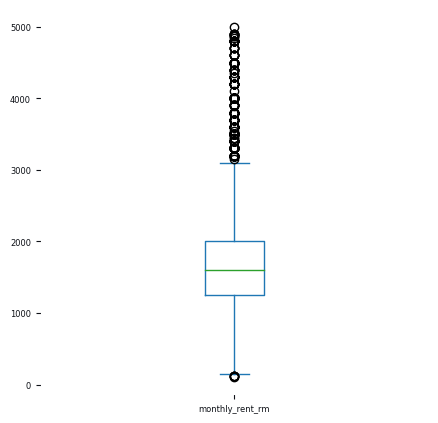

In [1035]:
df.monthly_rent_rm.plot(kind='box', x='monthly_rent_rm');

**Size**
<br>
Removing outliers below 50sqft, and above 3000 sqft

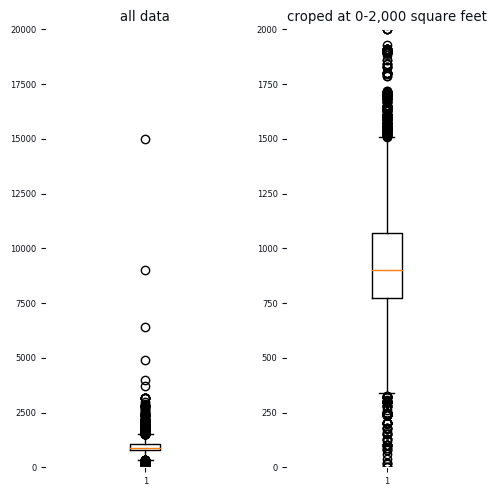

In [1036]:
fig, axs = plt.subplots(1,2)
axs[0].boxplot(data=df, x='size_sqft')
axs[0].set_ylim(0,20000)
axs[0].set_title('all data')

axs[1].boxplot(data=df, x='size_sqft')
axs[1].set_ylim(0,2000)
axs[1].set_title('croped at 0-2,000 square feet')

plt.tight_layout()
plt.show()

In [1037]:
df = df[(df['size_sqft'] > 50) & (df['size_sqft'] < 3000 )]

After removal:

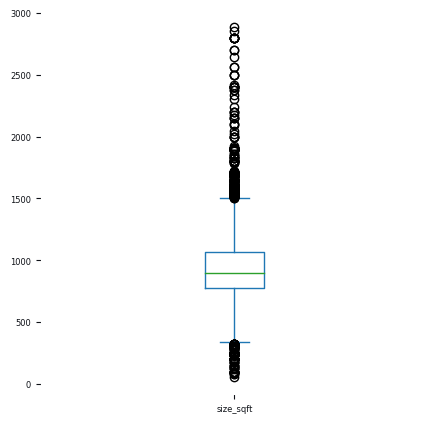

In [1038]:
df.size_sqft.plot(kind='box');

Final Data after Outlier Removal


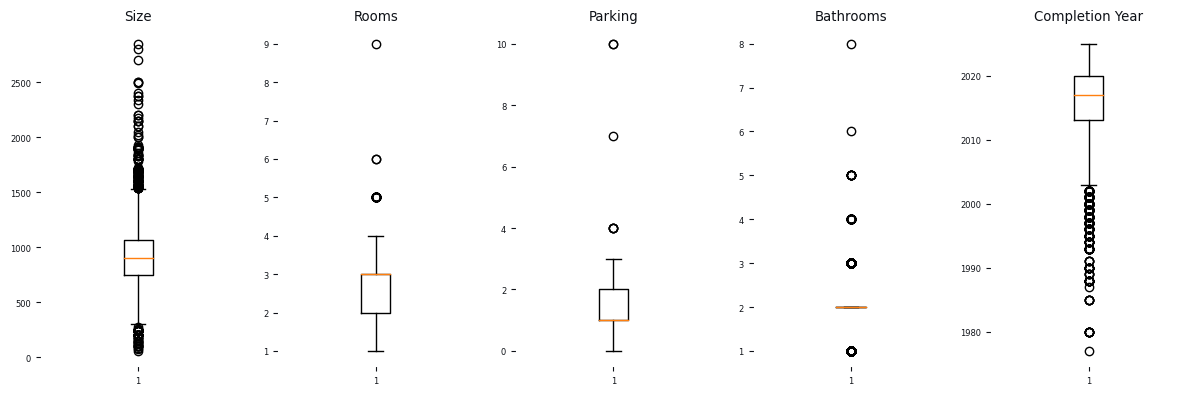

In [1039]:
fig, axs = plt.subplots(1,5, figsize=(12,4))
axs[0].boxplot(data=df.dropna(), x='size_sqft')
axs[1].boxplot(data=df.dropna(), x='rooms_num')
axs[2].boxplot(data=df.dropna(), x='parking')
axs[3].boxplot(data=df.dropna(), x='bathroom')
axs[4].boxplot(data=df.dropna(), x='completion_year')

axs[0].set_title('Size')
axs[1].set_title('Rooms')
axs[2].set_title('Parking')
axs[3].set_title('Bathrooms')
axs[4].set_title('Completion Year')

plt.tight_layout()
plt.show()



**Extracting Near KTM/LRT**
<br>
Hypotheses: closer access to KTM/LRT = higher monthly rent


In [1040]:
#extracting near KTM/LRT from the additional facilities
def extract_near_ktm_lrt(text):
    try:
        if "Near KTM/LRT" in text:
            return 'yes'
        return 'no'
    except TypeError:
        return text

df['nearby_railways'] = df['additional_facilities'].apply(lambda x: extract_near_ktm_lrt(x))
df.head()

,ads_id,prop_name,completion_year,monthly_rent_rm,location,property_type,rooms,parking,bathroom,size_sqft,furnished,facilities,additional_facilities,region,area,rooms_num,nearby_railways
0,100323185,The Hipster @ Taman Desa,2022.0,4200,Kuala Lumpur - Taman Desa,Condominium,5,2.0,6.0,1842,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur,Taman Desa,5.0,no
3,100191767,Sentul Point Suite Apartment,2020.0,1700,Kuala Lumpur - Sentul,Apartment,2,1.0,2.0,743,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur,Sentul,2.0,yes
7,100322885,Arte Plus Jalan Ampang,2018.0,1550,Kuala Lumpur - Ampang,Service Residence,1,1.0,1.0,700,Fully Furnished,"Parking, Gymnasium, Playground, Security, Lift...","Air-Cond, Cooking Allowed, Near KTM/LRT, Washi...",Kuala Lumpur,Ampang,1.0,yes
8,100322866,Nova I,2014.0,1400,Kuala Lumpur - Segambut,Apartment,2,1.0,1.0,750,Fully Furnished,"Playground, Security, Parking, Lift, Swimming ...","Air-Cond, Cooking Allowed, Washing Machine, Ne...",Kuala Lumpur,Segambut,2.0,yes
10,100322813,The Park Sky Residence @ Bukit Jalil City,2019.0,2600,Kuala Lumpur - Bukit Jalil,Service Residence,2,0.0,2.0,868,Partially Furnished,"Parking, Playground, Swimming Pool, Security, ...","Cooking Allowed, Near KTM/LRT",Kuala Lumpur,Bukit Jalil,2.0,yes


Plotting the difference in rental price between nearby KTM/LRT or not:


 
Median:
Nearby KTM/LRT: 1600RM
Not nearby KTM/LRT: 1500RM
      


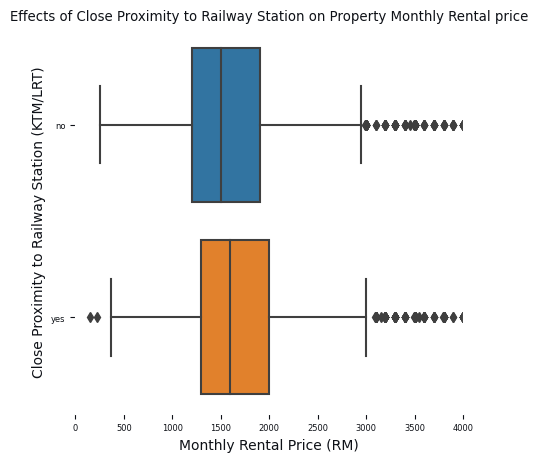

In [1041]:
sns.boxplot(data=df, x='monthly_rent_rm', y='nearby_railways')
plt.title('Effects of Close Proximity to Railway Station on Property Monthly Rental price')
plt.ylabel('Close Proximity to Railway Station (KTM/LRT)')
plt.xlabel('Monthly Rental Price (RM)')
plt.xlim(0,4000);

near_ktmlrt = df.query(" nearby_railways == 'yes' ")
not_near_ktmlrt = df.query(" nearby_railways == 'no' ")

print(f""" 
Median:
Nearby KTM/LRT: {near_ktmlrt.monthly_rent_rm.median():.0f}RM
Not nearby KTM/LRT: {not_near_ktmlrt.monthly_rent_rm.median():.0f}RM
      """)

Sanity check:


In [1042]:
df[df['prop_name'] == 'M Centura'][['nearby_railways']].value_counts()

nearby_railways
yes                110
no                  25
dtype: int64

*As seen above, the box plot shows that it sligthly increases the median monthly rent by RM100. However, near KTM/LRT is not appearing in all row even though the property is the same*

Conclusion: Near KTM/LRT may be used, but it can be improved as the listing is inconsistent

Dropping columns 'ads_id', 'prop_name', 'location', 'facilities', 'additional_facilities' and 'region' because they are either already cleaned or they are not suitable for modelling

In [1043]:
df = df.drop(columns=[
    'ads_id',
    'prop_name', 
    'rooms',
    'location',
    'facilities', 
    'additional_facilities',
]).reset_index(drop=True)

In [1044]:
#export data training
df.to_csv('data_clean.csv', index=False)

### **Data Exploration**

**Property Size by Number of Rooms**

<function matplotlib.pyplot.show(close=None, block=None)>

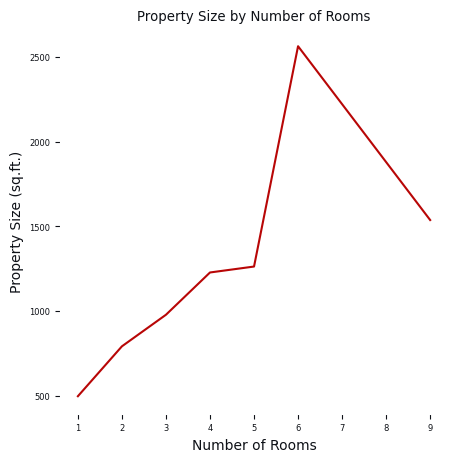

In [1045]:
data = df.groupby('rooms_num')['size_sqft'].median()
rc = {'figure.figsize':(5,5),
        'axes.facecolor':'white',
        'axes.edgecolor': 'white',
        'axes.labelcolor': '#0e1117',
        'figure.facecolor': 'white',
        'patch.edgecolor': 'white',
        'text.color': '#0e1117',
        'xtick.color': '#0e1117',
        'ytick.color': '#0e1117',
        'grid.color': 'grey',
        'font.size' : 8,
        'axes.labelsize': 10,
        'xtick.labelsize': 6,
        'ytick.labelsize': 6}
plt.rcParams.update(rc)
fig, ax = plt.subplots()

ax = sns.lineplot(x=data.index, y=data.values, data=data, color = '#b80606')
ax.set(title='Property Size by Number of Rooms', xlabel = 'Number of Rooms', ylabel = 'Property Size (sq.ft.)')
plt.show

**Monthly Rental by Size**

<function matplotlib.pyplot.show(close=None, block=None)>

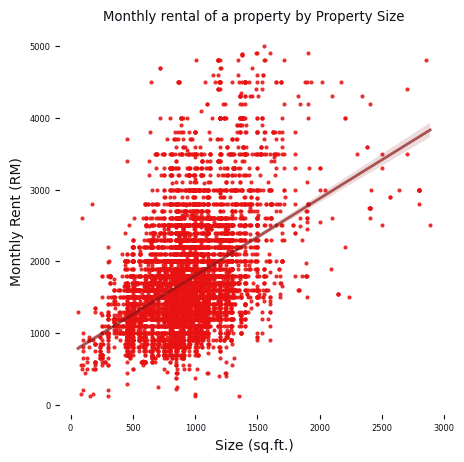

In [1046]:
rc = {'figure.figsize':(5,5),
        'axes.facecolor':'white',
        'axes.edgecolor': 'white',
        'axes.labelcolor': '#0e1117',
        'figure.facecolor': 'white',
        'patch.edgecolor': 'white',
        'text.color': '#0e1117',
        'xtick.color': '#0e1117',
        'ytick.color': '#0e1117',
        'grid.color': 'grey',
        'font.size' : 8,
        'axes.labelsize': 10,
        'xtick.labelsize': 6,
        'ytick.labelsize': 6}
plt.rcParams.update(rc)
fig, ax = plt.subplots()
ax = sns.regplot(x=df['size_sqft'], y=df['monthly_rent_rm'], x_jitter=.1, data=df, color = '#b80606',scatter_kws={"color": "#e81212", 's':4},line_kws={"color": "#8c1717", 'alpha':0.7, 'linewidth':2})
ax.set(title='Monthly rental of a property by Property Size', xlabel = 'Size (sq.ft.)', ylabel = 'Monthly Rent (RM)')
plt.show

**Mean Rental Price by Property Area**

<function matplotlib.pyplot.show(close=None, block=None)>

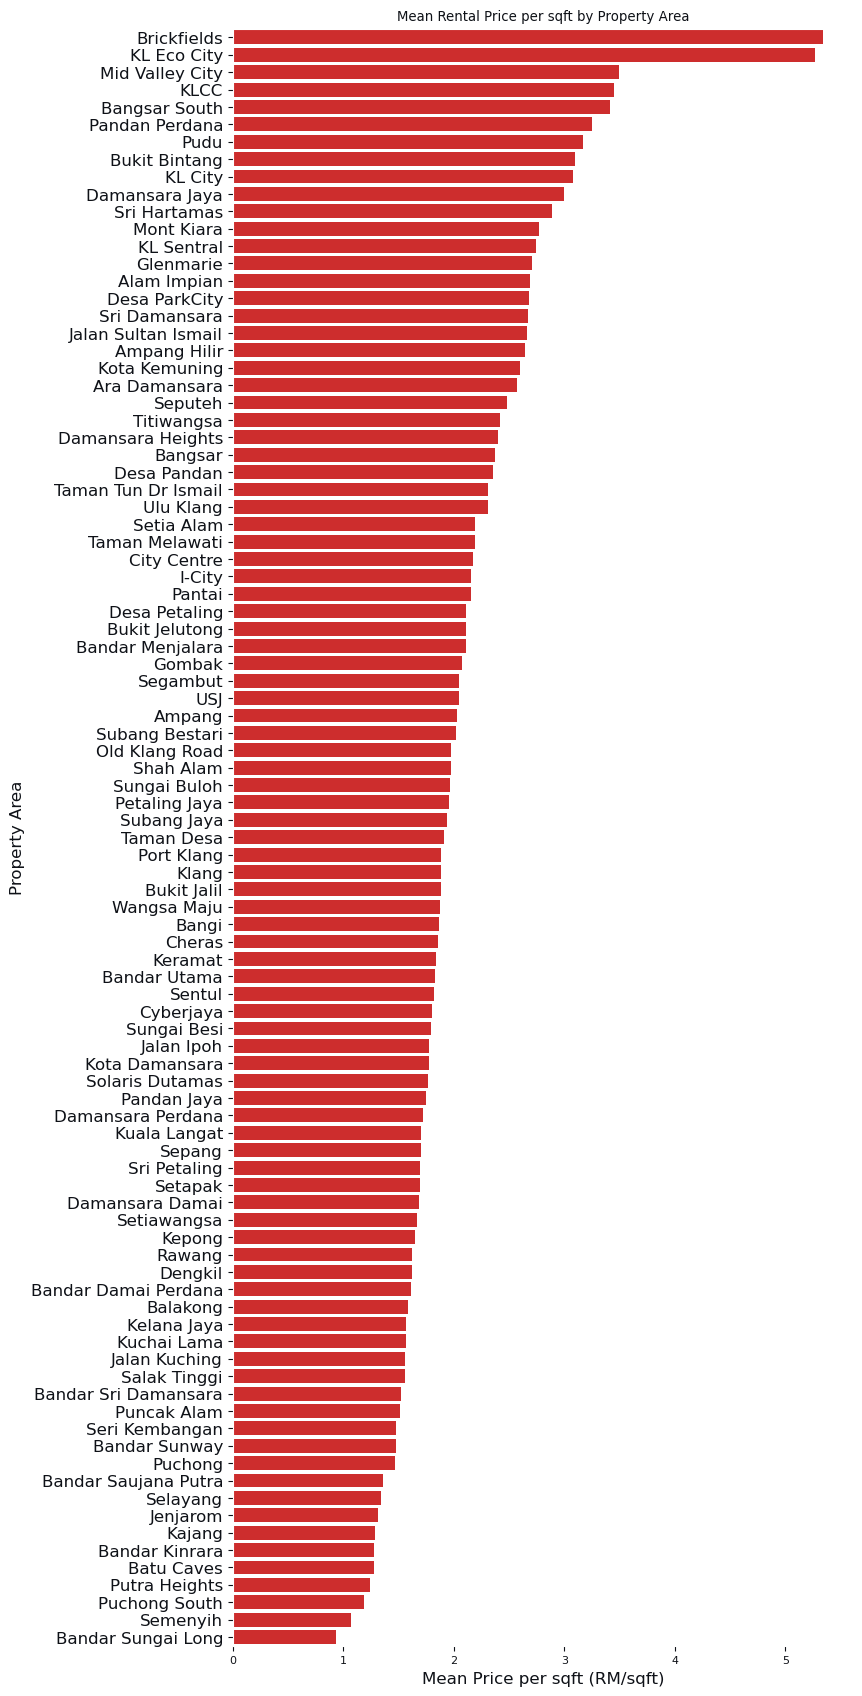

In [1047]:
data = df.groupby('area').apply(lambda x: x.monthly_rent_rm.sum() / x.size_sqft.sum()).sort_values(ascending=False)

rc = {'figure.figsize':(8,21),
        'axes.facecolor':'white',
        'axes.edgecolor': 'white',
        'axes.labelcolor': '#0e1117',
        'figure.facecolor': 'white',
        'patch.edgecolor': 'white',
        'text.color': '#0e1117',
        'xtick.color': '#0e1117',
        'ytick.color': '#0e1117',
        'grid.color': 'grey',
        'font.size' : 8,
        'axes.labelsize': 12,
        'xtick.labelsize': 8,
        'ytick.labelsize': 12}
plt.rcParams.update(rc)
fig, ax = plt.subplots()
ax = sns.barplot(x=data.values, y=data.index, orient='h', color = '#e81212')
ax.set(title='Mean Rental Price per sqft by Property Area', xlabel = 'Mean Price per sqft (RM/sqft)', ylabel = 'Property Area')
plt.show

**Monthly Rent by Furnishing Status**

<function matplotlib.pyplot.show(close=None, block=None)>

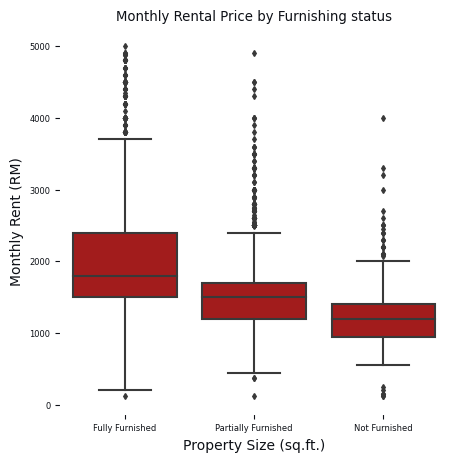

In [1048]:
rc = {'figure.figsize':(5,5),
        'axes.facecolor':'white',
        'axes.edgecolor': 'white',
        'axes.labelcolor': '#0e1117',
        'figure.facecolor': 'white',
        'patch.edgecolor': 'white',
        'text.color': '#0e1117',
        'xtick.color': '#0e1117',
        'ytick.color': '#0e1117',
        'grid.color': 'grey',
        'font.size' : 8,
        'axes.labelsize': 10,
        'xtick.labelsize': 6,
        'ytick.labelsize': 6}
plt.rcParams.update(rc)
fig, ax = plt.subplots()
ax = sns.boxplot(x=df['furnished'], y=df['monthly_rent_rm'], data=df, color = '#b80606', fliersize=3)
ax.set(title='Monthly Rental Price by Furnishing status', xlabel = 'Property Size (sq.ft.)', ylabel = 'Monthly Rent (RM)')
plt.show

*Input-Output*

In [1049]:
X = df.drop('monthly_rent_rm', axis=1)
y = df['monthly_rent_rm']

In [1050]:
X

,completion_year,property_type,parking,bathroom,size_sqft,furnished,region,area,rooms_num,nearby_railways
0,2022.0,Condominium,2.0,6.0,1842,Fully Furnished,Kuala Lumpur,Taman Desa,5.0,no
1,2020.0,Apartment,1.0,2.0,743,Partially Furnished,Kuala Lumpur,Sentul,2.0,yes
2,2018.0,Service Residence,1.0,1.0,700,Fully Furnished,Kuala Lumpur,Ampang,1.0,yes
3,2014.0,Apartment,1.0,1.0,750,Fully Furnished,Kuala Lumpur,Segambut,2.0,yes
4,2019.0,Service Residence,0.0,2.0,868,Partially Furnished,Kuala Lumpur,Bukit Jalil,2.0,yes
...,...,...,...,...,...,...,...,...,...,...
10563,2009.0,Service Residence,1.0,2.0,780,Fully Furnished,Selangor,Cyberjaya,2.0,no
10564,2021.0,Condominium,2.0,2.0,1015,Partially Furnished,Selangor,Cyberjaya,3.0,yes
10565,2019.0,Service Residence,2.0,1.0,455,Fully Furnished,Selangor,Kajang,2.0,no
10566,2018.0,Service Residence,2.0,3.0,1427,Partially Furnished,Selangor,Bandar Saujana Putra,4.0,no


In [1051]:
y

0        4200
1        1700
2        1550
3        1400
4        2600
         ... 
10563    1200
10564     885
10565    1500
10566    1300
10567    1000
Name: monthly_rent_rm, Length: 10568, dtype: int64

**Train-Test Split Data**

In [1052]:
#import libraries
from sklearn.model_selection import train_test_split

In [1053]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 0)


In [1054]:
#sanity check
len(X_test)/len(X)

0.20003785011355035

Reset index of training and testing data

In [1055]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

**Data Imputation**

In [1056]:
X_train.isna().sum()

completion_year       0
property_type         0
parking               0
bathroom              0
size_sqft             0
furnished             0
region                0
area                  0
rooms_num             0
nearby_railways    2358
dtype: int64

**nearby_railways**
<br>
Missing values in nerby_railways will be filled by using K-Nearest Neighbour imputation

Creating dummy data for Categorical Variables

In [1057]:
X_train_cat = X_train.select_dtypes(include='object')
X_train_cat_dummies = pd.get_dummies(X_train_cat, drop_first=True)

In [1058]:
X_train_cat_dummies.head()

,property_type_Condominium,property_type_Duplex,property_type_Flat,property_type_Others,property_type_Service Residence,property_type_Studio,property_type_Townhouse Condo,furnished_Not Furnished,furnished_Partially Furnished,region_Selangor,...,area_Sungai Besi,area_Sungai Buloh,area_Taman Desa,area_Taman Melawati,area_Taman Tun Dr Ismail,area_Titiwangsa,area_USJ,area_Ulu Klang,area_Wangsa Maju,nearby_railways_yes
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [1059]:
df_imputation = X_train.drop(X_train_cat.columns, axis=1)
df_imputation = pd.concat([df_imputation, X_train_cat_dummies],axis=1)
df_imputation.head()

,completion_year,parking,bathroom,size_sqft,rooms_num,property_type_Condominium,property_type_Duplex,property_type_Flat,property_type_Others,property_type_Service Residence,...,area_Sungai Besi,area_Sungai Buloh,area_Taman Desa,area_Taman Melawati,area_Taman Tun Dr Ismail,area_Titiwangsa,area_USJ,area_Ulu Klang,area_Wangsa Maju,nearby_railways_yes
0,2019.0,2.0,2.0,1023,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017.0,2.0,3.0,1186,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021.0,1.0,2.0,1200,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2008.0,2.0,2.0,1228,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2022.0,1.0,2.0,890,3.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


Normalise data for KNN Imputer

In [1060]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_imputation = pd.DataFrame(scaler.fit_transform(df_imputation), columns = df_imputation.columns)
df_imputation

,completion_year,parking,bathroom,size_sqft,rooms_num,property_type_Condominium,property_type_Duplex,property_type_Flat,property_type_Others,property_type_Service Residence,...,area_Sungai Besi,area_Sungai Buloh,area_Taman Desa,area_Taman Melawati,area_Taman Tun Dr Ismail,area_Titiwangsa,area_USJ,area_Ulu Klang,area_Wangsa Maju,nearby_railways_yes
0,0.875000,0.2,0.142857,0.340877,0.250,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.833333,0.2,0.285714,0.398515,0.250,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.916667,0.1,0.142857,0.403465,0.250,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.645833,0.2,0.142857,0.413366,0.250,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.937500,0.1,0.142857,0.293847,0.250,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8449,0.854167,0.0,0.142857,0.423621,0.375,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8450,0.291667,0.1,0.142857,0.403465,0.125,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8451,0.791667,0.1,0.142857,0.363508,0.125,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8452,0.854167,0.0,0.142857,0.371287,0.125,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [1061]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df_imputation = pd.DataFrame(imputer.fit_transform(df_imputation),columns = df_imputation.columns)

In [1062]:
X_train.drop(columns='nearby_railways', axis=1, inplace=True)
X_train = pd.concat([X_train, df_imputation['nearby_railways_yes']], axis=1)

In [1063]:
X_train.isna().sum()

completion_year        0
property_type          0
parking                0
bathroom               0
size_sqft              0
furnished              0
region                 0
area                   0
rooms_num              0
nearby_railways_yes    0
dtype: int64

Same imputation process for X_train

In [1064]:
X_test.isna().sum()

completion_year      0
property_type        0
parking              0
bathroom             0
size_sqft            0
furnished            0
region               0
area                 0
rooms_num            0
nearby_railways    546
dtype: int64

In [1065]:
X_test_cat = X_test.select_dtypes(include='object')
X_test_cat_dummies = pd.get_dummies(X_test_cat, drop_first=True)

In [1066]:
X_test_imputation = X_test.drop(X_test_cat.columns, axis=1)
X_test_imputation = pd.concat([X_test_imputation, X_test_cat_dummies],axis=1)
X_test_imputation.head()

,completion_year,parking,bathroom,size_sqft,rooms_num,property_type_Condominium,property_type_Duplex,property_type_Flat,property_type_Others,property_type_Service Residence,...,area_Sungai Besi,area_Sungai Buloh,area_Taman Desa,area_Taman Melawati,area_Taman Tun Dr Ismail,area_Titiwangsa,area_USJ,area_Ulu Klang,area_Wangsa Maju,nearby_railways_yes
0,2015.0,2.0,3.0,1647,4.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006.0,0.0,2.0,775,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2021.0,1.0,2.0,800,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2018.0,1.0,2.0,842,3.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2016.0,0.0,1.0,580,2.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Normalise data for KNN Imputer

In [1067]:
X_test_imputation = pd.DataFrame(scaler.fit_transform(X_test_imputation), columns = X_test_imputation.columns)
X_test_imputation

,completion_year,parking,bathroom,size_sqft,rooms_num,property_type_Condominium,property_type_Duplex,property_type_Flat,property_type_Others,property_type_Service Residence,...,area_Sungai Besi,area_Sungai Buloh,area_Taman Desa,area_Taman Melawati,area_Taman Tun Dr Ismail,area_Titiwangsa,area_USJ,area_Ulu Klang,area_Wangsa Maju,nearby_railways_yes
0,0.777778,0.2,0.50,0.572963,0.75,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.577778,0.0,0.25,0.250000,0.50,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.911111,0.1,0.25,0.259259,0.50,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.844444,0.1,0.25,0.274815,0.50,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.800000,0.0,0.00,0.177778,0.25,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2109,0.644444,0.1,0.00,0.241852,0.25,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,0.911111,0.0,0.25,0.266296,0.50,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2111,0.888889,0.1,0.00,0.222222,0.00,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2112,0.822222,0.0,0.25,0.353704,0.50,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1068]:
imputer = KNNImputer(n_neighbors=2)
X_test_imputation = pd.DataFrame(imputer.fit_transform(X_test_imputation),columns = X_test_imputation.columns)

In [1069]:
X_test.drop(columns='nearby_railways', axis=1, inplace=True)
X_test = pd.concat([X_test, X_test_imputation['nearby_railways_yes']], axis=1)

In [1070]:
X_test.isna().sum()

completion_year        0
property_type          0
parking                0
bathroom               0
size_sqft              0
furnished              0
region                 0
area                   0
rooms_num              0
nearby_railways_yes    0
dtype: int64

**Preprocessing Categorical Variables in data**
<br>
by using One Hot Encoding

In [1071]:
from sklearn.preprocessing import OneHotEncoder

In [1072]:
X_train_cat = X_train.select_dtypes(include='object')

In [1073]:
X_train_cat

,property_type,furnished,region,area
0,Condominium,Fully Furnished,Selangor,Kajang
1,Condominium,Fully Furnished,Kuala Lumpur,Sentul
2,Condominium,Fully Furnished,Kuala Lumpur,Kuchai Lama
3,Condominium,Fully Furnished,Selangor,Petaling Jaya
4,Service Residence,Fully Furnished,Kuala Lumpur,Bangsar South
...,...,...,...,...
8449,Service Residence,Fully Furnished,Selangor,Jenjarom
8450,Condominium,Fully Furnished,Kuala Lumpur,Bangsar
8451,Service Residence,Fully Furnished,Kuala Lumpur,Desa Pandan
8452,Service Residence,Fully Furnished,Selangor,Shah Alam


In [1074]:
ohe = OneHotEncoder(handle_unknown = 'ignore', drop='if_binary')
ohe.fit(X_train_cat)

OneHotEncoder(drop='if_binary', handle_unknown='ignore')

In [1075]:
def get_ohe(df):
    df_cat = df.select_dtypes(include='object')
    temp_df = pd.DataFrame(data=ohe.transform(df_cat).toarray(), columns=ohe.get_feature_names_out())
    df.drop(df_cat.columns, axis=1, inplace=True)
    df = pd.concat([df.reset_index(drop=True), temp_df], axis=1)
    return df

In [1076]:
X_train = get_ohe(X_train)
X_test = get_ohe(X_test)

In [1077]:
X_train.isna().sum()

completion_year             0
parking                     0
bathroom                    0
size_sqft                   0
rooms_num                   0
                           ..
area_Taman Tun Dr Ismail    0
area_Titiwangsa             0
area_USJ                    0
area_Ulu Klang              0
area_Wangsa Maju            0
Length: 111, dtype: int64

**Feature Selection**
<br>
Select features based on significance of each feature in a Random Forest Regression Model by calculating feature importance

In [1078]:
from sklearn.ensemble import RandomForestRegressor

In [1079]:
# fit random forest regressor
rf_tree = RandomForestRegressor(n_estimators = 100,
                                criterion = "absolute_error",
                                max_features = "sqrt",
                                random_state = 0)
rf_tree.fit(X_train, y_train)
y_pred = rf_tree.predict(X_test)

In [1080]:
# calculate the feature importances
importances = rf_tree.feature_importances_

# sort the feature importances in descending order
sorted_index = importances.argsort()[::-1]

# put feature imporatnces into a dictionary
dict_feature_importance = {}
for i in sorted_index:
    dict_feature_importance.update({X_train.columns[i]: importances[i]})

# Create a DataFrame from the dictionary
df_importance = pd.DataFrame.from_dict(dict_feature_importance, orient='index', columns=['values'])
df_importance = df_importance.reset_index()
df_importance.columns = ['feature', 'importance_value']
df_importance.sort_values(by='importance_value', ascending=False).head(30)

,feature,importance_value
0,size_sqft,0.213622
1,completion_year,0.113937
2,furnished_Fully Furnished,0.059771
3,parking,0.057340
4,rooms_num,0.053445
5,region_Selangor,0.051669
6,bathroom,0.042272
7,nearby_railways_yes,0.026271
8,furnished_Partially Furnished,0.025992
9,furnished_Not Furnished,0.025927


Based on this feature importance table, out of the features *area, completion_year, property_type, size_sqft, rooms_num, bathroom, parking, furnished and nearby_railways*, the features *property_type and region* do not seem suitable for our prediction model. For the reason being that none of the *property_type* features are featured in the top 10. While *region* is removed due to the the opinion that the feature *area* will be able to predict the monthly rental more precisely.

So this means that **size_sqft, completion_year, furnished, parking, rooms_num, bathroom, area and nearby_railways** will be selected to train the regression model as there are the most significant features in the dataset to predicting the monthly rental of a property.

In [1081]:
# filter out property_type and region features from training and testing data
X_train_clean = X_train[X_train.columns.drop(list(X_train.filter(regex='property_type|region')))]
X_test_clean = X_test[X_test.columns.drop(list(X_test.filter(regex='property_type|region')))]
X_train_clean

,completion_year,parking,bathroom,size_sqft,rooms_num,nearby_railways_yes,furnished_Fully Furnished,furnished_Not Furnished,furnished_Partially Furnished,area_Alam Impian,...,area_Subang Jaya,area_Sungai Besi,area_Sungai Buloh,area_Taman Desa,area_Taman Melawati,area_Taman Tun Dr Ismail,area_Titiwangsa,area_USJ,area_Ulu Klang,area_Wangsa Maju
0,2019.0,2.0,2.0,1023,3.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017.0,2.0,3.0,1186,3.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021.0,1.0,2.0,1200,3.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2008.0,2.0,2.0,1228,3.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022.0,1.0,2.0,890,3.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8449,2018.0,0.0,2.0,1257,4.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8450,1991.0,1.0,2.0,1200,2.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8451,2015.0,1.0,2.0,1087,2.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8452,2018.0,0.0,2.0,1109,2.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1082]:
#export data training
X_train_clean.to_csv('X_train_clean.csv', index=False)

**Standardization**

In [1083]:
from sklearn.preprocessing import StandardScaler
# columns that were not encoded
num_cols = ['completion_year', 'parking', 'bathroom', 'size_sqft', 'rooms_num']

def standardizeData(data):
    data_num =  data[num_cols]
    data_columns = data_num.columns  
    data_index = data.index 
        
    # Fit standardizer
    standardizer = StandardScaler()
    standardizer.fit(data_num)

    # Transform data
    standardized_data_raw = standardizer.transform(data_num)
    standardized_data = pd.DataFrame(standardized_data_raw)
    standardized_data.columns = data_columns
    standardized_data.index = data_index

    return standardized_data

def merge_num_and_cat_data(data, standardized_data):
    data_num =  data[num_cols]
    data_encoded = data.drop(columns=data_num.columns, axis=1)
    standardized_df = pd.concat([data_encoded, standardized_data], axis=1)
    return standardized_df

In [1084]:
X_train_std = standardizeData(data=X_train_clean)
X_train_scaled = merge_num_and_cat_data(data=X_train_clean, standardized_data=X_train_std)
X_test_std = standardizeData(data=X_test_clean)
X_test_scaled = merge_num_and_cat_data(data=X_test_clean, standardized_data=X_test_std)

In [1085]:
X_train_scaled

,nearby_railways_yes,furnished_Fully Furnished,furnished_Not Furnished,furnished_Partially Furnished,area_Alam Impian,area_Ampang,area_Ampang Hilir,area_Ara Damansara,area_Balakong,area_Bandar Damai Perdana,...,area_Taman Tun Dr Ismail,area_Titiwangsa,area_USJ,area_Ulu Klang,area_Wangsa Maju,completion_year,parking,bathroom,size_sqft,rooms_num
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.621056,1.126893,0.217262,0.354195,0.464160
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.325125,1.126893,2.072549,0.924329,0.464160
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.916987,-0.138784,0.217262,0.973297,0.464160
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.006564,1.126893,0.217262,1.071234,0.464160
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.064953,-0.138784,0.217262,-0.111006,0.464160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8449,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.473091,-1.404462,0.217262,1.172669,1.634807
8450,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-3.521978,-0.138784,0.217262,0.973297,-0.706487
8451,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.029194,-0.138784,0.217262,0.578051,-0.706487
8452,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.473091,-1.404462,0.217262,0.655002,-0.706487


**Training Machine Learning**

Since this is a regression model, R2 score and mean absolute error (MAE) will be used as a performance metrics.

Random Forest and Gradient Boosting will also be used to better improve the performance of the model.

In [1086]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn import preprocessing

In [1087]:
model = LinearRegression()
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)

# Calculate mean absolute error
mae_linreg = mean_absolute_error(y_test, y_pred)

# Calculate R-squared
r2_linreg = r2_score(y_test, y_pred)

print(f"R2-score: {r2_linreg:.4f} and MAE score: {mae_linreg:.4f}")

R2-score: 0.6401 and MAE score: 287.0034


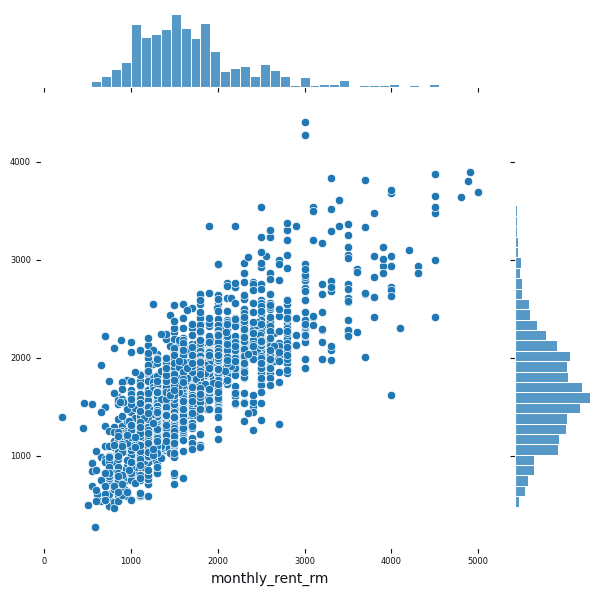

In [1088]:
sns.jointplot(x=y_test, y=y_pred);

**Gradient Boosting**

In [1089]:
from sklearn.ensemble import GradientBoostingRegressor

In [1090]:
grad_tree = GradientBoostingRegressor(random_state = 0)
grad_tree.fit(X_train_scaled, y_train)
y_pred = grad_tree.predict(X_test_scaled)

# Calculate mean absolute error
mae_gb = mean_absolute_error(y_test, y_pred)

# Calculate R-squared
r2_gb = r2_score(y_test, y_pred)

print(f"R2-score: {r2_gb:.4f} and MAE score: {mae_gb:.4f}")

R2-score: 0.6543 and MAE score: 275.7577


*Hyperparameter Tuning*

In [1091]:
from sklearn.model_selection import GridSearchCV 

params = {'n_estimators': [100, 200, 300, 400, 500],
        'learning_rate': [0.1, 0.05, 0.01]}

grad_tree = GradientBoostingRegressor(random_state = 0)

grad_tree_cv = GridSearchCV(estimator = grad_tree,
                           param_grid = params,
                           cv = 5,
                           scoring = "neg_mean_absolute_error")

In [945]:
# Fit Grid Search CV
grad_tree_cv.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
# Best parameters for Gradient Boost Regressor
grad_tree_cv.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [1092]:
# Refit Gradient Boost Regressor
best_learning_rate = 0.1
best_n_estimators = 500
grad_tree = GradientBoostingRegressor(n_estimators = best_n_estimators,
                                      random_state = 0)

grad_tree.fit(X_train_scaled, y_train)
y_pred = grad_tree.predict(X_test_scaled)

# Calculate mean absolute error
mae_gb_cv = mean_absolute_error(y_test, y_pred)

# Calculate R-squared
r2_gb_cv = r2_score(y_test, y_pred)

print(f"R2-score: {r2_gb_cv:.4f} and MAE score: {mae_gb_cv:.4f}")

R2-score: 0.7313 and MAE score: 237.4389


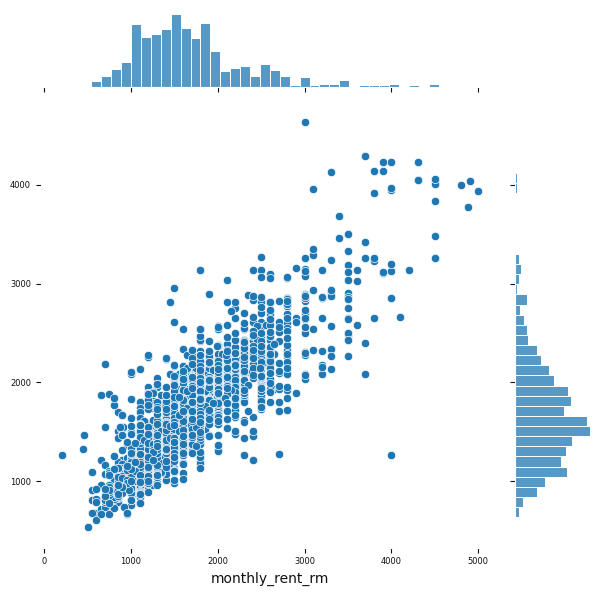

In [1093]:
sns.jointplot(x=y_test, y=y_pred);

**Random Forest**

In [1094]:
rf_tree = RandomForestRegressor(n_estimators = 100,
                                criterion = "absolute_error",
                                max_features = "sqrt",
                                random_state = 0)
rf_tree.fit(X_train_scaled, y_train)
y_pred = rf_tree.predict(X_test_scaled)

# Calculate mean absolute error
mae_rf = mean_absolute_error(y_test, y_pred)

# Calculate R-squared
r2_rf = r2_score(y_test, y_pred)

print(f"R2-score: {r2_rf:.4f} and MAE score: {mae_rf:.4f}")

R2-score: 0.7905 and MAE score: 199.8021


*Hyperparameter Tuning*

In [358]:
params = {"n_estimators": [100, 200, 300, 500 ],
          "max_features": ["sqrt", "log2"]}

# Grid Search
rf_tree = RandomForestRegressor(criterion = "absolute_error",
                                random_state = 0)

rf_tree_cv = GridSearchCV(estimator = rf_tree,
                          param_grid = params,
                          cv = 5,
                          scoring = "neg_mean_absolute_error")

In [359]:
# Fit Grid Search CV
rf_tree_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(criterion='absolute_error',
                                             random_state=0),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='neg_mean_absolute_error')

In [360]:
# Best parameters for Random Forest Regressor
rf_tree_cv.best_params_

{'max_features': 'sqrt', 'n_estimators': 500}

In [1095]:
# Refit the Random Forest
best_max_features = 'sqrt'
best_n_estimators = 500
rf_tree = RandomForestRegressor(criterion = "squared_error",
                                max_features = best_max_features,
                                n_estimators = best_n_estimators,
                                random_state = 0)

rf_tree.fit(X_train_scaled, y_train)
y_pred = rf_tree.predict(X_test_scaled)

# Calculate mean absolute error
mae_rf_cv = mean_absolute_error(y_test, y_pred)

# # Calculate R-squared
r2_rf_cv = r2_score(y_test, y_pred)

print(f"R2-score: {r2_rf_cv:.4f} and MAE score: {mae_rf_cv:.4f}")

R2-score: 0.7967 and MAE score: 195.5746


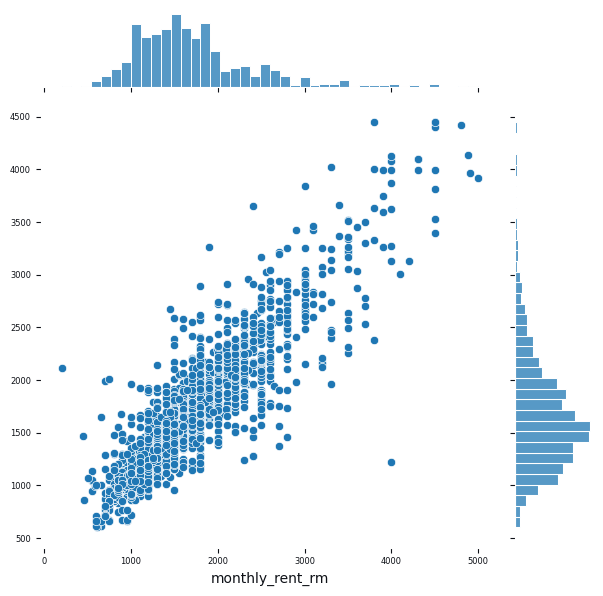

In [1096]:
sns.jointplot(x=y_test, y=y_pred)

In [1097]:
mae_scores = [mae_linreg, mae_gb, mae_gb_cv, mae_rf, mae_rf_cv]
r2_scores = [r2_linreg, r2_gb, r2_gb_cv, r2_rf, r2_rf_cv]
indexes = ["linear regression", "gradient boosting", "gradient boosting with CV", "random forest",  "random forest with CV"]

summary_df = pd.DataFrame({
    "MAE": mae_scores,
    "R2-Score": r2_scores,
},index = indexes)

summary_df.sort_values(by='R2-Score', ascending=False)

,MAE,R2-Score
random forest with CV,195.574552,0.796742
random forest,199.802058,0.790452
gradient boosting with CV,237.438901,0.731342
gradient boosting,275.757749,0.654274
linear regression,287.003356,0.640069


**Results**
<br>
Result indicates that the best model for prediction is Random Forest with hyperparameter tuning, scoring almost 0.8 on R2-score, and a MAE of RM195. While the Linear Regression model that was initial goal of the project performs the worst, with an R2-score of around 0.64 and a MAE of RM287.

The features that are quite significant in affecting the monthly rental prices of a property is its size, year of construction completion, its fully furnished status. Notable locations that seem to increase the rental price the most are KLCC and Mont Kiara.

In [1099]:
# Export model for real-time prediction
from joblib import dump
dump(model, 'model/lin_reg_model.pkl')
dump(grad_tree, 'model/grad_model.pkl')
dump(rf_tree, 'model/rf_model.pkl', compress=1)

['model/rf_model.pkl']